In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('linkedin-reviews.csv')

In [4]:
data.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


C:\Users\HP\AppData\Local\Temp\ipykernel_5656\3294564269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Rating', palette='deep')


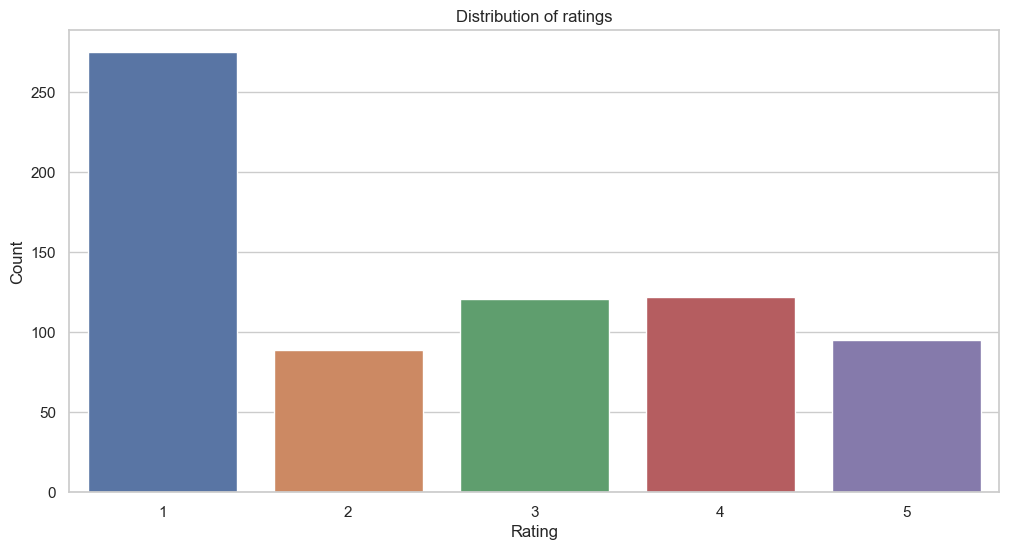

In [5]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Rating', palette='deep')
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('DistributionOfRatings.png')
plt.show()

In [6]:
from textblob import TextBlob

In [7]:
def analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'positive'
    elif sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['Review'].apply(analysis)

In [8]:
data.head()

,Review,Rating,sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,negative
1,Force close(galaxy tab),1,neutral
2,Slow and it tries to upload your contacts with...,1,negative
3,Add ability to customize the profile and move ...,4,neutral
4,"Good app, but it's a pain that it's not possib...",4,positive


In [9]:
sentimentdata = data['sentiment'].value_counts()

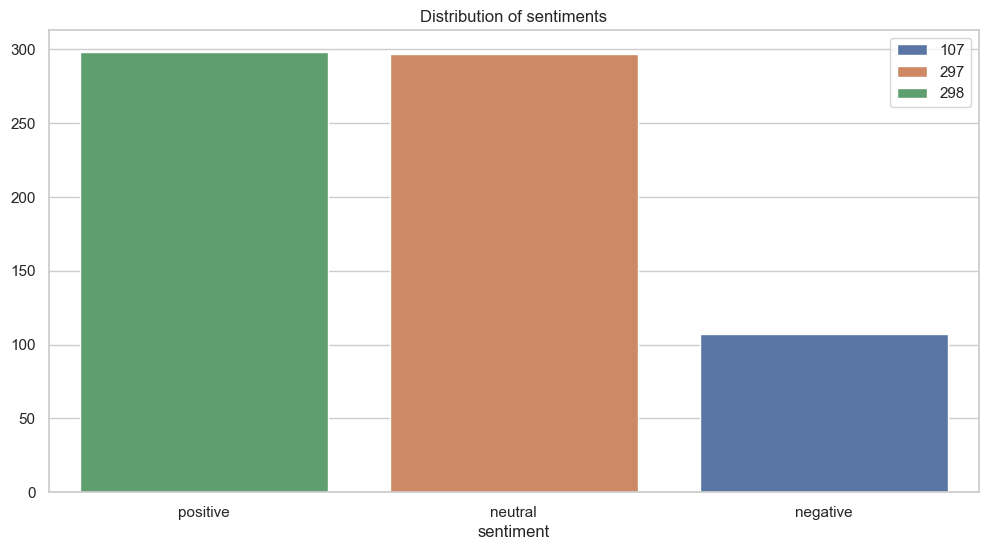

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x=sentimentdata.index, y=sentimentdata.values, palette='deep', hue=sentimentdata.values)
plt.title('Distribution of sentiments')
plt.savefig('DistributioOfSentiments.png')

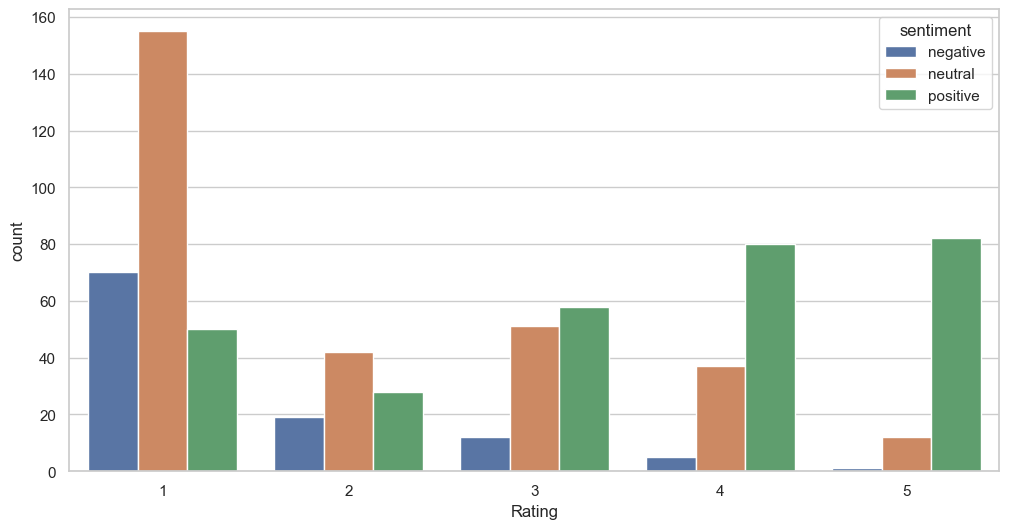

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Rating', hue='sentiment')
plt.savefig('SentimentOverRating.png')